In [81]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


In [82]:
# Read the housing_merge.csv
housing_df = pd.read_csv("../Resources/housing_merge.csv")
housing_df.head()

,price,bathrooms,sqft_living,sqft_lot,floors,view,condition,yr_built,zipcode,total_pop,avg_income,city,violent_crime,robbery,prop_crime,crime_rate_per_capita,age_of_house
0,231300.0,1.00,1180,5650,1.0,0,3,1955,98178,13220,68004.765507,Seattle,183.1,210.02,2209.8,0.013850,70
1,538000.0,2.25,2570,7242,2.0,0,3,1951,98125,21760,89057.812500,Seattle,183.1,210.02,2209.8,0.008415,74
2,604000.0,3.00,1960,5000,1.0,0,5,1965,98136,8840,142535.067873,Seattle,183.1,210.02,2209.8,0.020713,60
3,510000.0,2.00,1680,8080,1.0,0,3,1987,98074,12680,236032.492114,Sammamish,33.9,2.10,727.3,0.002674,38
4,1225000.0,4.50,5420,101930,1.0,0,3,2001,98053,10030,207522.133599,Redmond,64.6,19.70,2137.3,0.006441,24


In [83]:
# One-Hot Encoding for the 'city', 'zipcode" column
df_encoded = pd.get_dummies(housing_df, columns=['city', 'zipcode'])

print(df_encoded)

           price  bathrooms  sqft_living  sqft_lot  floors  view  condition  \
0       231300.0       1.00         1180      5650     1.0     0          3   
1       538000.0       2.25         2570      7242     2.0     0          3   
2       604000.0       3.00         1960      5000     1.0     0          5   
3       510000.0       2.00         1680      8080     1.0     0          3   
4      1225000.0       4.50         5420    101930     1.0     0          3   
...          ...        ...          ...       ...     ...   ...        ...   
19938   475000.0       2.50         1310      1294     2.0     0          3   
19939   360000.0       2.50         1530      1131     3.0     0          3   
19940   400000.0       2.50         2310      5813     2.0     0          3   
19941   402101.0       0.75         1020      1350     2.0     0          3   
19942   325000.0       0.75         1020      1076     2.0     0          3   

       yr_built  total_pop     avg_income  ...  zip

In [84]:
df_encoded.columns

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'yr_built', 'total_pop', 'avg_income', 'violent_crime',
       'robbery', 'prop_crime', 'crime_rate_per_capita', 'age_of_house',
       'city_Auburn', 'city_Bellevue', 'city_Federal Way', 'city_Kent',
       'city_Kirkland', 'city_Redmond', 'city_Renton', 'city_Sammamish',
       'city_Seattle', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98023', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98042',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
       'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109',
       'zipcode_98112', 'zipcode_

In [85]:
# Drop rows with missing values
df_encoded.dropna(inplace=True)

In [86]:
df_encoded.fillna(0, inplace=True)

In [87]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df_encoded["price"]

# Separate the X variable, the features
X = df_encoded.drop("price", axis=1)
feature_names = X.columns
X.head()

,bathrooms,sqft_living,sqft_lot,floors,view,condition,yr_built,total_pop,avg_income,violent_crime,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1.00,1180,5650,1.0,0,3,1955,13220,68004.765507,183.1,...,False,False,False,False,False,False,True,False,False,False
1,2.25,2570,7242,2.0,0,3,1951,21760,89057.812500,183.1,...,False,False,False,False,False,False,False,False,False,False
2,3.00,1960,5000,1.0,0,5,1965,8840,142535.067873,183.1,...,False,False,False,False,False,False,False,False,False,False
3,2.00,1680,8080,1.0,0,3,1987,12680,236032.492114,33.9,...,False,False,False,False,False,False,False,False,False,False
4,4.50,5420,101930,1.0,0,3,2001,10030,207522.133599,64.6,...,False,False,False,False,False,False,False,False,False,False


In [88]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [89]:
print(X_train.shape)

(14957, 76)


## Machine Learning: Create a Linear Regression Model

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)

model.score(X_test, y_test)



0.7644471062946187

In [91]:
# Predictions on the test set
predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, predictions)

# Print the evaluation results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 36511501550.4654
R-squared: 0.7644471062946187


In [92]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.76912271, 0.77688175, 0.75615681, 0.75343734, 0.76676599])

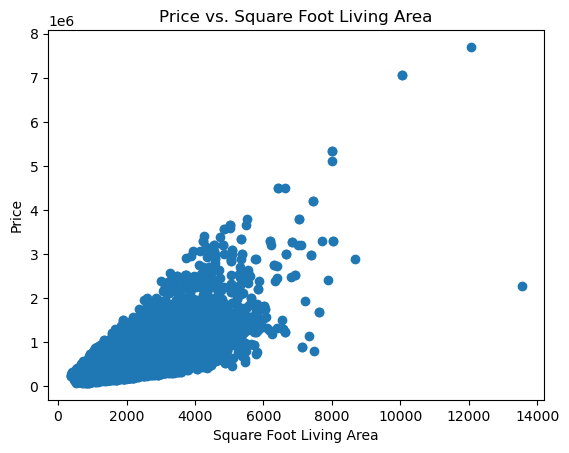

In [93]:
import matplotlib.pyplot as plt

# Scatter plot of price vs. sqft_living
plt.scatter(df_encoded['sqft_living'], df_encoded['price'])
plt.xlabel('Square Foot Living Area')
plt.ylabel('Price')
plt.title('Price vs. Square Foot Living Area')
plt.show()

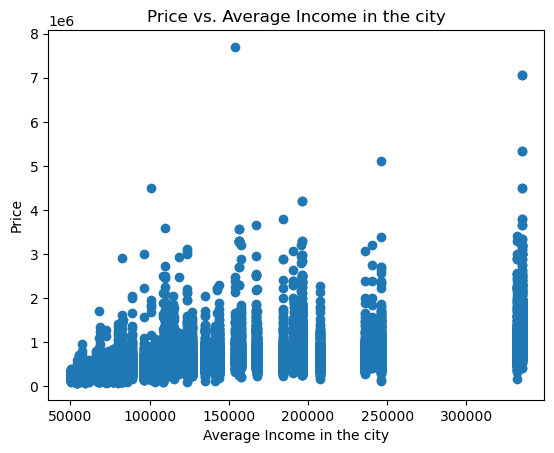

In [94]:
# Scatter plot of price vs. avg_income
plt.scatter(df_encoded['avg_income'], df_encoded['price'])
plt.xlabel('Average Income in the city')
plt.ylabel('Price')
plt.title('Price vs. Average Income in the city')
plt.show()

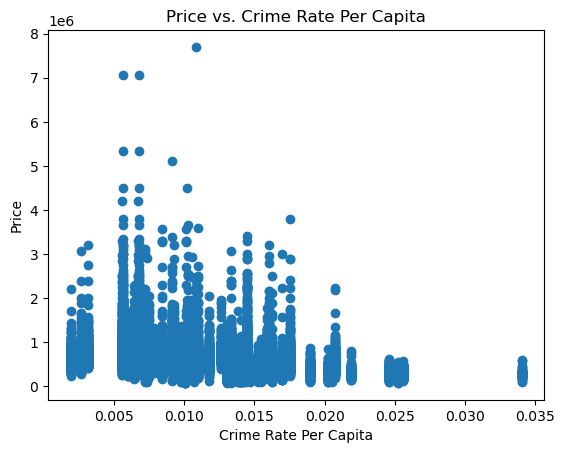

In [95]:
# Scatter plot of price vs. crime_rate_per_capita
plt.scatter(df_encoded['crime_rate_per_capita'], df_encoded['price'])
plt.xlabel('Crime Rate Per Capita')
plt.ylabel('Price')
plt.title('Price vs. Crime Rate Per Capita')
plt.show()

In [96]:
correlation_matrix = df_encoded.corr()
print(correlation_matrix)

                  price  bathrooms  sqft_living  sqft_lot    floors      view  \
price          1.000000   0.522807     0.708473  0.105991  0.247435  0.406197   
bathrooms      0.522807   1.000000     0.753467  0.100253  0.484211  0.206215   
sqft_living    0.708473   0.753467     1.000000  0.212536  0.337082  0.307542   
sqft_lot       0.105991   0.100253     0.212536  1.000000 -0.028252  0.073867   
floors         0.247435   0.484211     0.337082 -0.028252  1.000000  0.038197   
...                 ...        ...          ...       ...       ...       ...   
zipcode_98177  0.037439   0.001783     0.032497  0.003544 -0.038684  0.083757   
zipcode_98178 -0.071205  -0.053245    -0.041640 -0.015441 -0.058689  0.043338   
zipcode_98188 -0.055764  -0.024052    -0.023284 -0.004181 -0.035594 -0.009979   
zipcode_98198 -0.076044  -0.046326    -0.040987 -0.003831 -0.051907  0.053765   
zipcode_98199  0.079846   0.013189     0.013948 -0.033761  0.001870  0.050618   

               condition  y

In [100]:
# Drop weak features
df_encoded1 = df_encoded.drop(columns=['condition', 'yr_built', 'sqft_lot', 'total_pop', 'floors', 'robbery', 'prop_crime', 'view'])
df_encoded1.head()

,price,bathrooms,sqft_living,avg_income,violent_crime,crime_rate_per_capita,age_of_house,city_Auburn,city_Bellevue,city_Federal Way,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,231300.0,1.00,1180,68004.765507,183.1,0.013850,70,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,538000.0,2.25,2570,89057.812500,183.1,0.008415,74,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,604000.0,3.00,1960,142535.067873,183.1,0.020713,60,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,510000.0,2.00,1680,236032.492114,33.9,0.002674,38,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1225000.0,4.50,5420,207522.133599,64.6,0.006441,24,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
df_encoded1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'avg_income',
       'city_Auburn', 'city_Bellevue', 'city_Federal Way', 'city_Kent',
       'city_Kirkland', 'city_Redmond', 'city_Renton', 'city_Sammamish',
       'city_Seattle', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98023', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98042',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
       'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109',
       'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117',
       'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125',
       'zipcode_98126', 'zipcode_981

In [55]:
# Separate the data into labels and features

# Separate the y variable, the labels
y1 = df_encoded1["price"]

# Separate the X variable, the features
X1 = df_encoded1.drop("price", axis=1)
feature_names1 = X1.columns

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X1_train1, X1_test1, y1_train1, y1_test1 = train_test_split(X1, y1, random_state=1)

model1 = LinearRegression()
# Fit the model to the training data
model1.fit(X1_train1, y1_train1)

model1.score(X1_test1, y1_test1)

# Predictions on the test set
predictions1 = model1.predict(X1_test1)

# Calculate Mean Squared Error (MSE)
mse1 = mean_squared_error(y1_test1, predictions1)

# Calculate R-squared (Coefficient of Determination)
r2_1 = r2_score(y1_test1, predictions1)

# Print the evaluation results
print(f"Mean Squared Error (MSE): {mse1}")
print(f"R-squared: {r2_1}")

Mean Squared Error (MSE): 37120653758.393166
R-squared: 0.7507946787302031


In [56]:
X1.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'avg_income', 'city_Auburn',
       'city_Bellevue', 'city_Federal Way', 'city_Kent', 'city_Kirkland',
       'city_Redmond', 'city_Renton', 'city_Sammamish', 'city_Seattle',
       'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98023', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98042', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98074', 'zipcode_98075', 'zipcode_98092',
       'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106',
       'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118',
       'zipcode_98119', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126',
       'zipcode_98133', 'zip

In [57]:
correlation_matrix1 = df_encoded1.corr()
print(correlation_matrix1)

                  price  bedrooms  bathrooms  sqft_living  avg_income  \
price          1.000000  0.300156   0.522010     0.708554    0.605129   
bedrooms       0.300156  1.000000   0.515391     0.572160    0.137863   
bathrooms      0.522010  0.515391   1.000000     0.752226    0.252256   
sqft_living    0.708554  0.572160   0.752226     1.000000    0.340995   
avg_income     0.605129  0.137863   0.252256     0.340995    1.000000   
...                 ...       ...        ...          ...         ...   
zipcode_98148 -0.036600 -0.014029  -0.020328    -0.026234   -0.054911   
zipcode_98155 -0.049065 -0.010555  -0.053283    -0.045138   -0.069657   
zipcode_98166 -0.024941 -0.001336  -0.025842     0.000860   -0.039560   
zipcode_98198 -0.076028 -0.026017  -0.046153    -0.040969   -0.110768   
zipcode_98199  0.079828 -0.023798   0.013293     0.013944    0.118706   

               city_Auburn  city_Bellevue  city_Federal Way  city_Kent  \
price            -0.211501       0.366141        

In [58]:
df_encoded1.head()

,price,bedrooms,bathrooms,sqft_living,avg_income,city_Auburn,city_Bellevue,city_Federal Way,city_Kent,city_Kirkland,...,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98198,zipcode_98199
0,231300.0,2,1.00,1180,68004.765507,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,538000.0,3,2.25,2570,89057.812500,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,604000.0,4,3.00,1960,142535.067873,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,510000.0,3,2.00,1680,236032.492114,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1225000.0,4,4.50,5420,207522.133599,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
# Drop price from encoded
df_encoded1_drop = df_encoded1.drop(columns=['price'])

In [60]:
# Export clean data to csv 
df_encoded1_drop.to_csv('Resources/df_encoded1_drop.csv', index=False)

In [61]:
# Save the train model to a. pkl file
import joblib
model_path = '../Anh/optimized_predict_pricing.pkl'
joblib.dump(model1, model_path)
print(f"Model saved at {model_path}")

Model saved at ../Anh/optimized_predict_pricing.pkl


In [62]:
import json
columns = {
    'data_columns': [col.lower() for col in X1.columns]
}
with open ("column.json", "w") as f:
    f.write(json.dumps(columns))

In [63]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import joblib

# Load the trained model
model = joblib.load('optimized_predict_pricing.pkl')

# Load the dataset for reference (you need to provide the path to your dataset)
df_encoded1 = pd.read_csv('Resources/df_encoded1_drop.csv')  

# Function to handle default values for user inputs
def get_user_input(prompt, default_value, value_type):
    user_input = input(f"{prompt} (default {default_value}): ")
    if not user_input:
        return value_type(default_value)
    try:
        return value_type(user_input)
    except ValueError:
        print(f"Invalid input. Using default value: {default_value}")
        return value_type(default_value)
# Preprocessing function (to ensure consistency with model training)
def preprocess_input_data(input_data):
    # One-hot encode the 'city' and 'zipcode' columns, similar to training time
    input_data_encoded = pd.get_dummies(input_data, columns=['city', 'zipcode'], drop_first=True)
    
    # Get all the columns from the original dataset used for training, including one-hot encoding
    model_columns = list(df_encoded1_drop.columns)
    
    # Ensure all columns are present (add missing columns with 0)
    missing_cols = set(model_columns) - set(input_data_encoded.columns)
    for col in missing_cols:
        input_data_encoded[col] = 0  # Add missing columns with 0
    
    # Ensure the column order is the same as during training
    input_data_encoded = input_data_encoded[model_columns]
    
    return input_data_encoded

In [64]:
def get_input():
    print("Please enter the following details (leave empty to use default values):")
    
    # User inputs with defaults, using helper function
    bedrooms = get_user_input("Number of Bedrooms", 3, int)
    bathrooms = get_user_input("Number of Bathrooms", 2.0, float)
    sqft_living = get_user_input("Square Feet of Living Area", 1500, int)
    avg_income = get_user_input("Average Income", 65000, float)
    city = get_user_input("City", "Seattle", str)
    zipcode = get_user_input("Zipcode", "98105", str)

    # Prepare the input data for prediction
    return (pd.DataFrame([[bedrooms, bathrooms, sqft_living, city, zipcode, avg_income]],
                              columns=['bedrooms', 'bathrooms', 'sqft_living', 'city', 'zipcode', 'avg_income']))

In [65]:
# Input data for prediction
(input_data) = get_input()

Please enter the following details (leave empty to use default values):


In [66]:
# View input data
print(input_data)

   bedrooms  bathrooms  sqft_living     city zipcode  avg_income
0         3        2.0         1200  Seattle   98002     80000.0


In [67]:
# Preprocess the input data (encode categorical variables)
input_data_encoded = preprocess_input_data(input_data)

In [68]:
# View data input encoded
print(input_data_encoded)

   bedrooms  bathrooms  sqft_living  avg_income  city_Auburn  city_Bellevue  \
0         3        2.0         1200     80000.0            0              0   

   city_Federal Way  city_Kent  city_Kirkland  city_Redmond  ...  \
0                 0          0              0             0  ...   

   zipcode_98126  zipcode_98133  zipcode_98136  zipcode_98144  zipcode_98146  \
0              0              0              0              0              0   

   zipcode_98148  zipcode_98155  zipcode_98166  zipcode_98198  zipcode_98199  
0              0              0              0              0              0  

[1 rows x 62 columns]


In [69]:
# Make the prediction using the trained model
predicted_price = model1.predict(input_data_encoded)[0]
print(f"The predicted housing price for your request is: ${predicted_price:,.2f}")

The predicted housing price for your request is: $153,463.05
